# Final Project

# Author: Carlo & Christin

**Dataset Source: Flight Price Prediction https://raw.githubusercontent.com/Cr7mlc/Final-Project-3401/master/Final%20Project/Clean_Dataset.csv**




In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Cr7mlc/Final-Project-3401/master/Final%20Project/Clean_Dataset.csv"
# first column as  index column
flight_prices = pd.read_csv(url, sep=',',index_col=0)

# Let's create a backup copy of the dataset
flight_prices_backup = flight_prices

In [3]:
#Printing filght_prices
flight_prices

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
#Describe the data set
flight_prices.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
#Info the data set
flight_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


# Plotting a Graph of the dataset

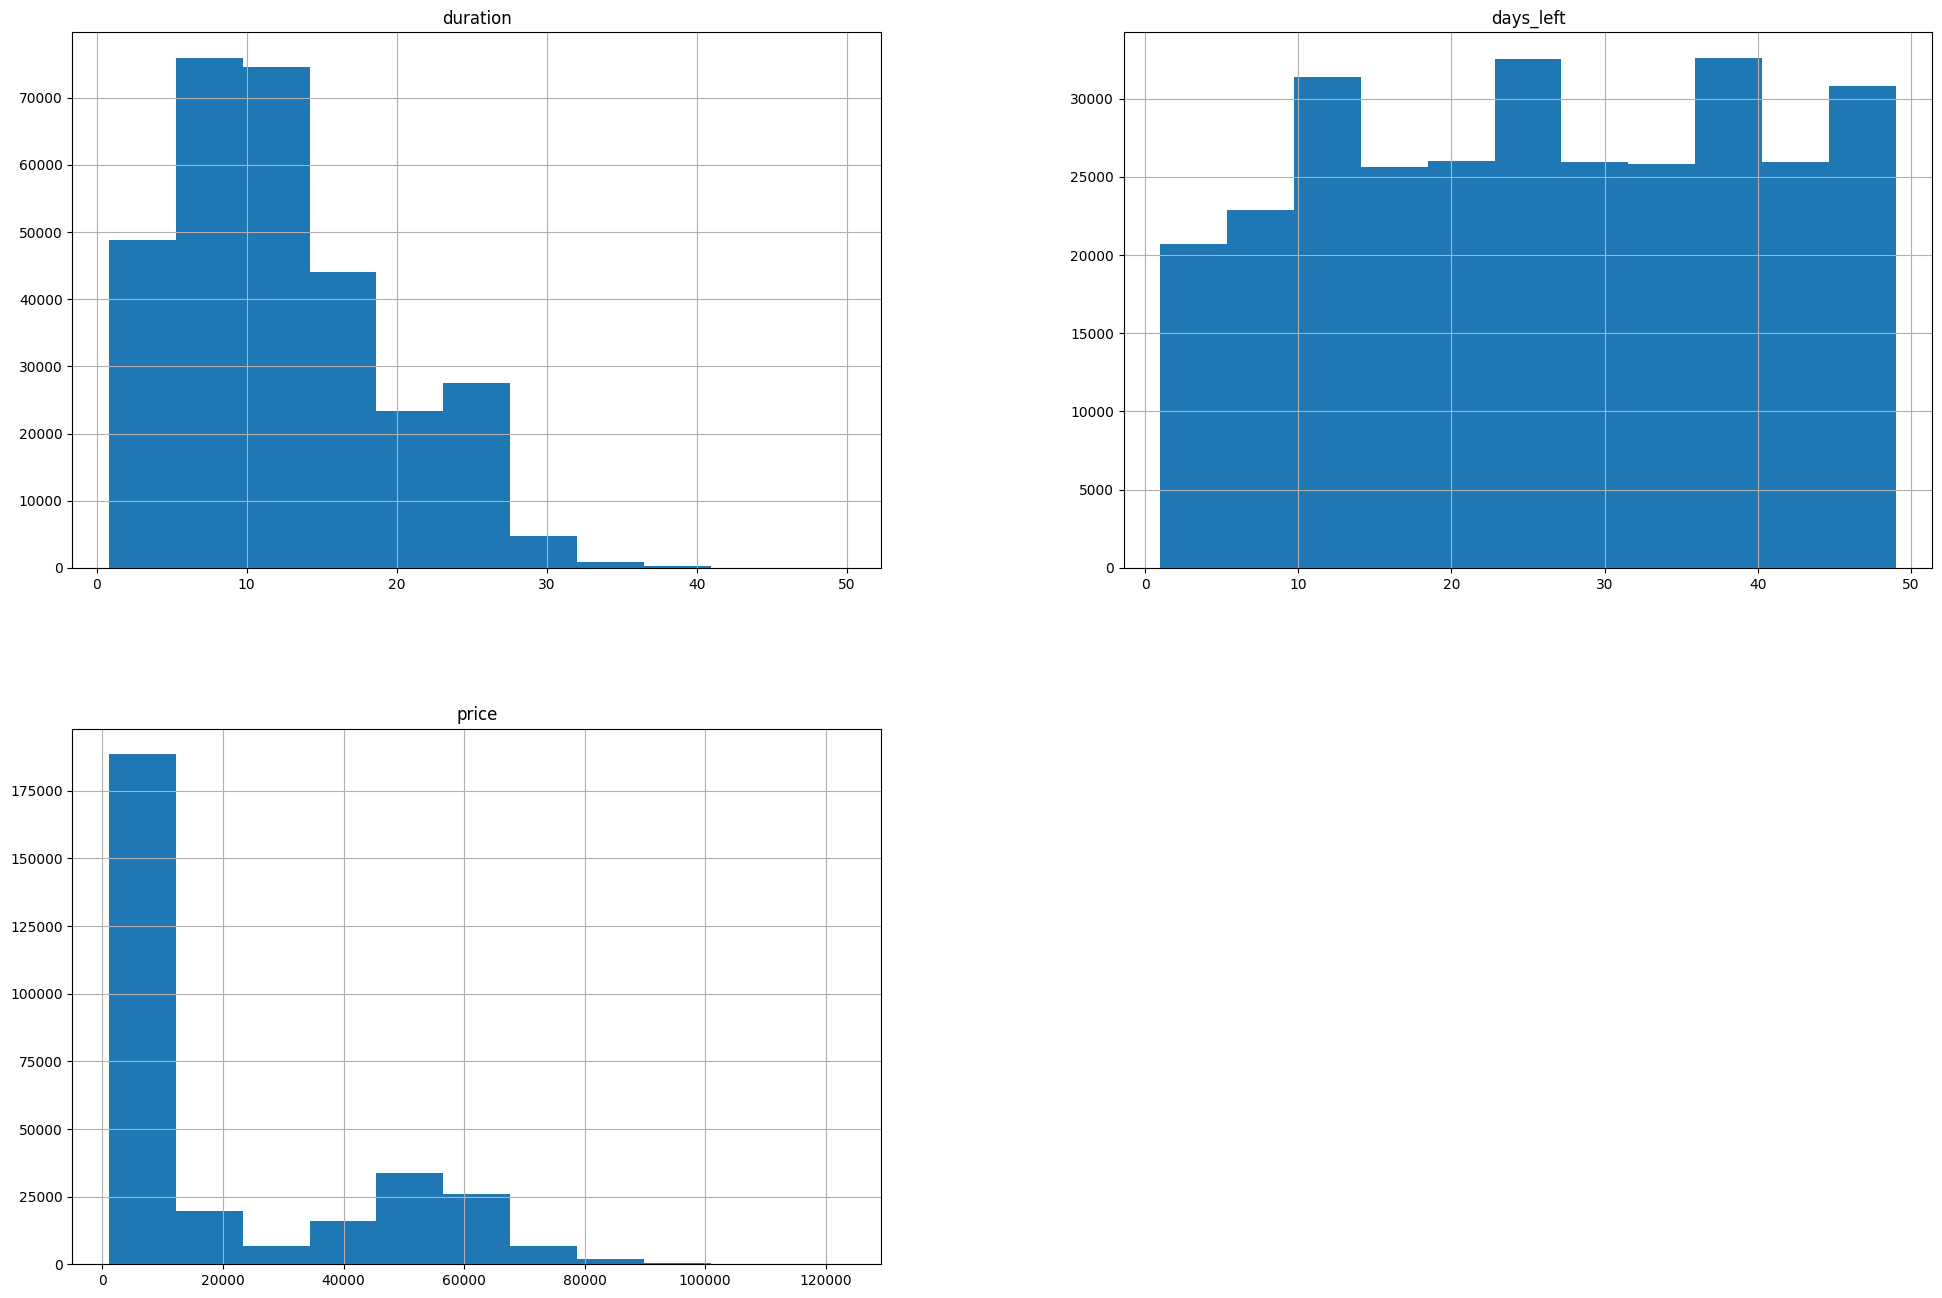

In [6]:
# plotting the Histogram
flight_prices.hist(bins=11,figsize=(24,16))
plt.show()

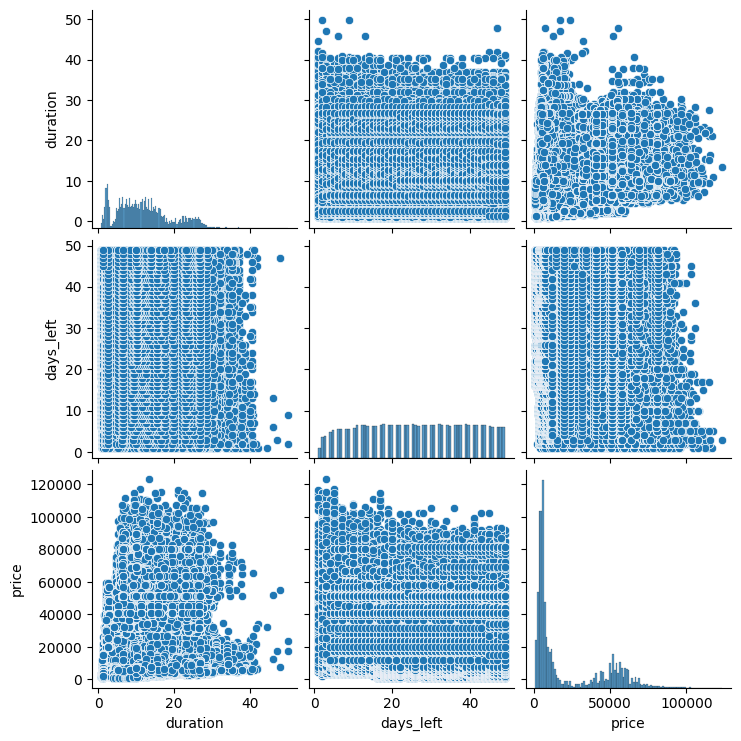

In [7]:
#Looking for correlations between featrues
sns.pairplot(flight_prices)

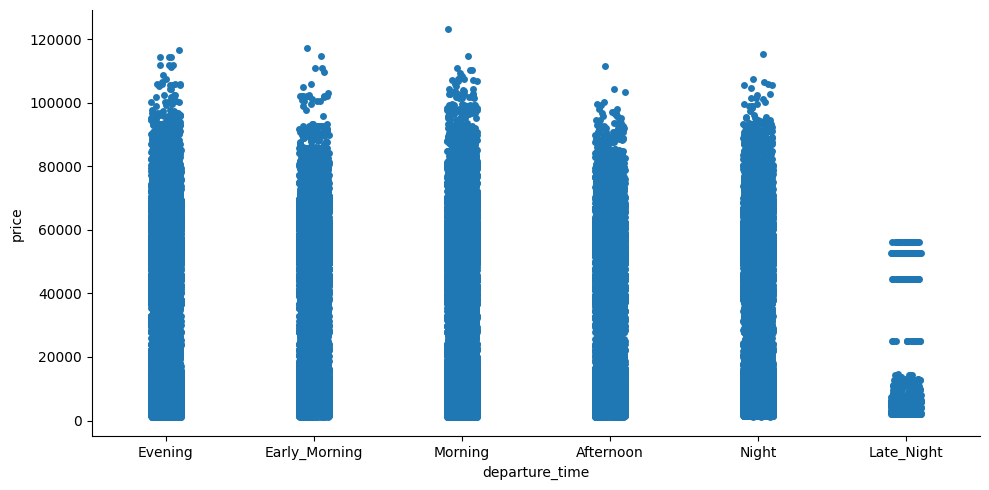

In [8]:
#Checking if for correlation between departure_time and price and 
sns.catplot(flight_prices, x="departure_time", y="price", height=5, aspect=2)

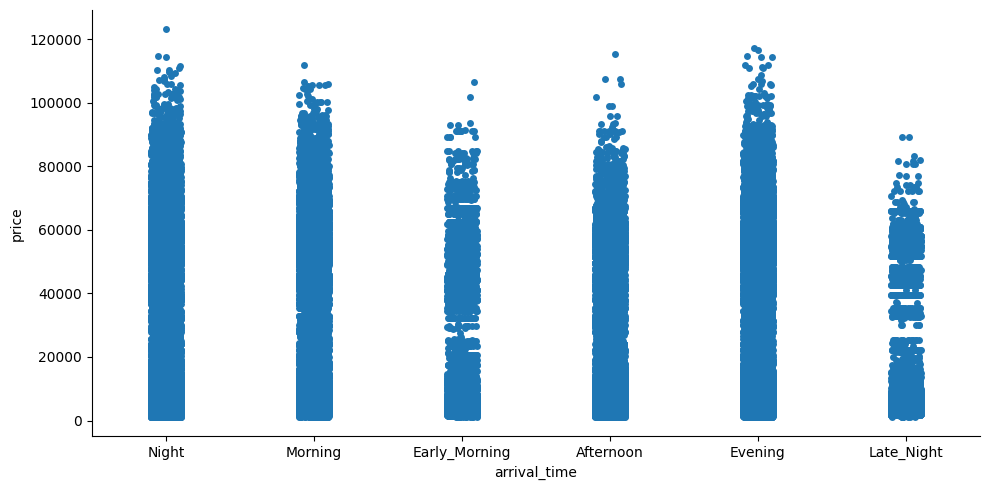

In [9]:
#Checking if for correlation between arrival_time and price and 
sns.catplot(flight_prices, x="arrival_time", y="price", height=5, aspect=2)

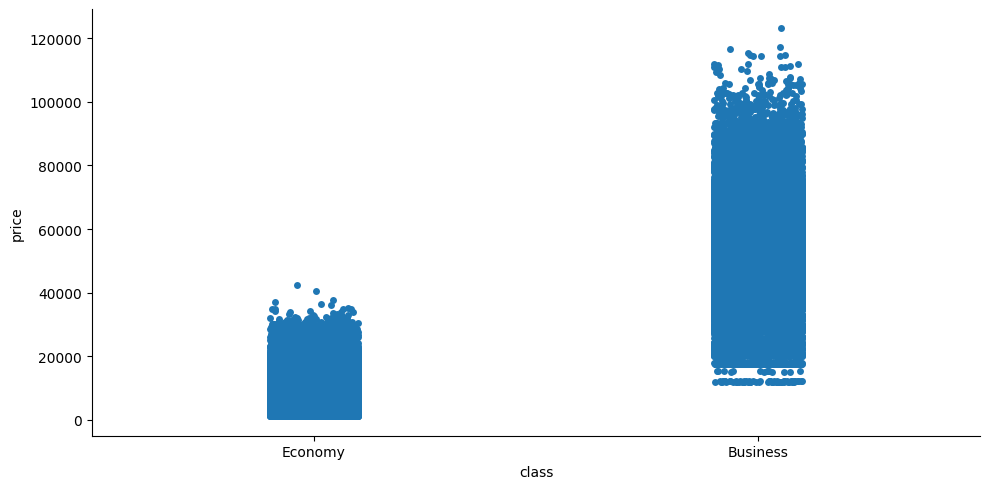

In [10]:
#Checking if for correlation between class and price and 
sns.catplot(flight_prices, x="class", y="price", height=5, aspect=2)

Text(0, 0.5, 'Duration')

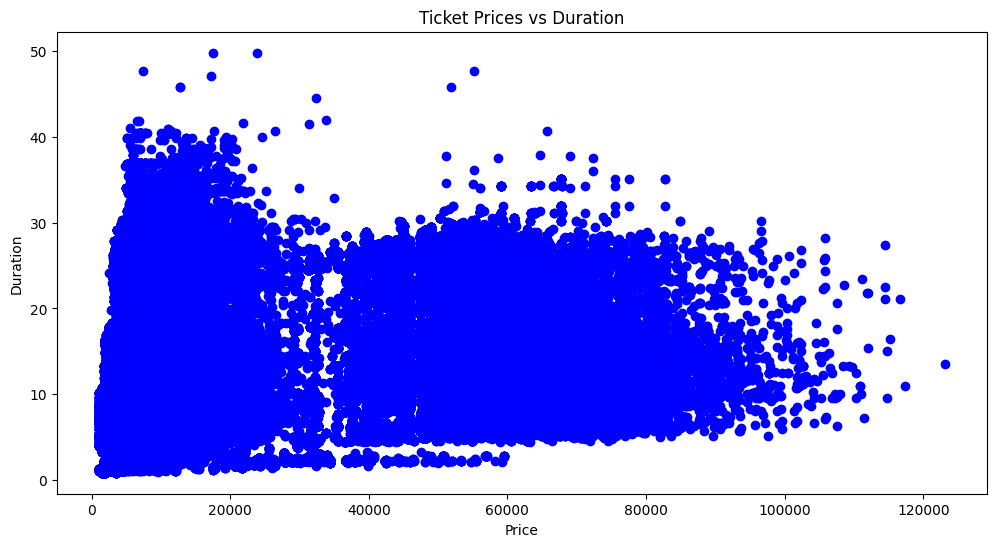

In [11]:
#let's plot price vs Duration

plt.figure(figsize=(12, 6))
plt.title('Ticket Prices vs Duration')
X = flight_prices["price"]
y = flight_prices["duration"]
# Plot points
plt.scatter(X, y, color = 'b')
plt.xlabel("Price")
plt.ylabel("Duration")

<Axes: title={'center': 'Ticket Prices vs. Days Left to Departure'}, xlabel='days_left', ylabel='price'>

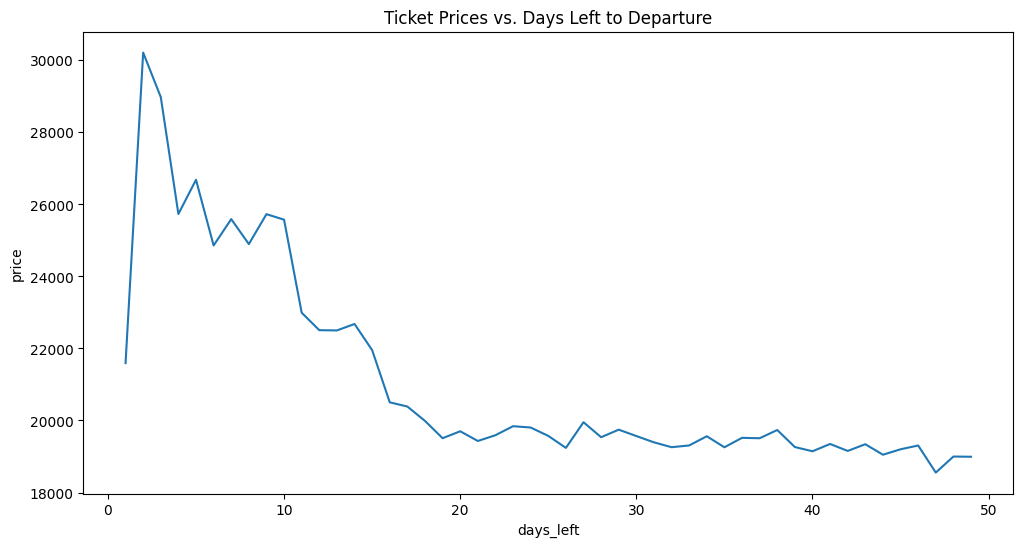

In [12]:
#let's plot price vs days_left
plt.figure(figsize=(12, 6))
plt.title('Ticket Prices vs. Days Left to Departure')
sns.lineplot(x="days_left",y="price",data=flight_prices,errorbar=None)

# Finding the best correlation between features

In [13]:
#corr method has pearson standard correlation coefficient as the default 

corr_matrix = flight_prices.corr(numeric_only=True)
corr_matrix

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [14]:
#Lets look at correlation with  regards to Price
corr_matrix["price"].sort_values(ascending=False)

price        1.000000
duration     0.204222
days_left   -0.091949
Name: price, dtype: float64

### Plotting tye correlation matrix


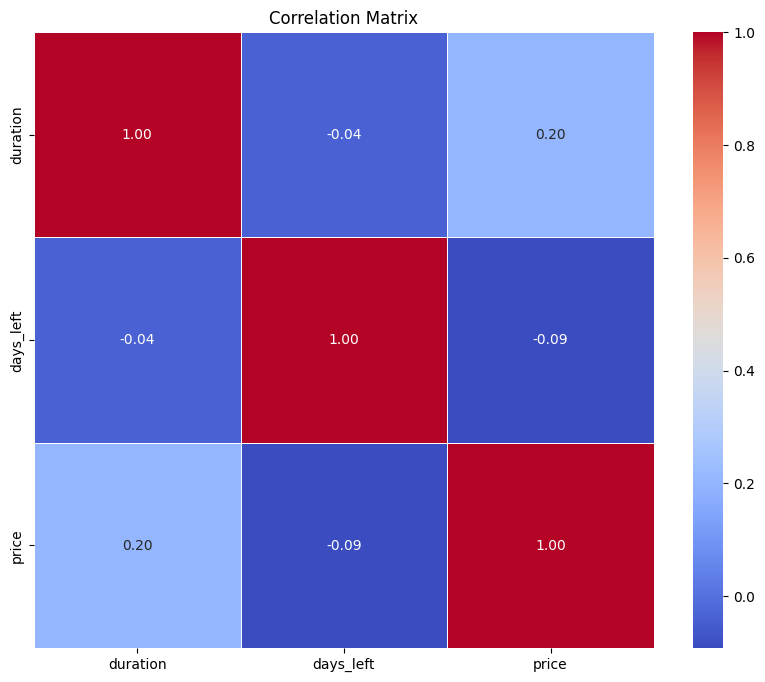

In [15]:
#The code was inspired by AFFAN YOUNIS 

# Select only numerical columns for correlation analysis
numerical_columns = flight_prices.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preparing the data for Machine Learning Algorithms

In [16]:
#Finding the duplicates
flight_prices.duplicated().sum() #No duplicate found

0

In [17]:
#Checking for null values
flight_prices.isna().sum() #No missing value found

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [18]:
#checking if there is any ? character
(flight_prices=='?').sum() #no records found

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
# Removing unecessary and redundant column
flight_prices.drop(columns=["flight", "arrival_time", "departure_time"], inplace=True)
flight_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   stops             300153 non-null  object 
 3   destination_city  300153 non-null  object 
 4   class             300153 non-null  object 
 5   duration          300153 non-null  float64
 6   days_left         300153 non-null  int64  
 7   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 20.6+ MB


# Creating a pipeline

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [21]:
#separating numerical and Categorical data

num_col = flight_prices.select_dtypes(include='number').columns.to_list()
cat_col = flight_prices.select_dtypes(exclude='number').columns.to_list()

#removing the target from numerical column 
num_col.remove("price")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_col),
                                   ('cat', cat_pipeline, cat_col)],
                                    remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['duration', 'days_left']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['airline', 'source_city', 'stops',
                                  'destination_city', 'class'])])

In [22]:
# Apply the preprocessing pipeline on the dataset

flights_prepared = preprocessing.fit_transform(flight_prices)

# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
flights_prepared = pd.DataFrame(data=flights_prepared, columns=feature_names)

flights_prepared

flights_prepared.columns

Index(['num__duration', 'num__days_left', 'cat__airline_AirAsia',
       'cat__airline_Air_India', 'cat__airline_GO_FIRST',
       'cat__airline_Indigo', 'cat__airline_SpiceJet', 'cat__airline_Vistara',
       'cat__source_city_Bangalore', 'cat__source_city_Chennai',
       'cat__source_city_Delhi', 'cat__source_city_Hyderabad',
       'cat__source_city_Kolkata', 'cat__source_city_Mumbai', 'cat__stops_one',
       'cat__stops_two_or_more', 'cat__stops_zero',
       'cat__destination_city_Bangalore', 'cat__destination_city_Chennai',
       'cat__destination_city_Delhi', 'cat__destination_city_Hyderabad',
       'cat__destination_city_Kolkata', 'cat__destination_city_Mumbai',
       'cat__class_Business', 'cat__class_Economy', 'remainder__price'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

#Separates the price from the rest of the data
X = flights_prepared.drop(["remainder__price"], axis=1)
y = flights_prepared["remainder__price"]

#Splits the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Prints the shape of each of the splits
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(240122, 25) (240122,) (60031, 25) (60031,)


# Trainning a Linear Regression Model

In [24]:
# Importing the Linear Regression model from sklearn's linear_model module
from sklearn.linear_model import LinearRegression

# Creating an instance of the LinearRegression model
lr_model = LinearRegression()

# Fitting the model with the training data (X_train and y_train)
lr_model.fit(X_train,y_train)

LinearRegression()

In [25]:
# Predict the target values using the trained linear regression model (lr_model) on the test set (X_test)
lr_y_predict = lr_model.predict(X_test)

# Import the mean_squared_error function from scikit-learn
from sklearn.metrics import mean_squared_error as mse

# Calculate the mean squared error (MSE) by comparing the true target values (y_test) with the predicted values (lr_y_predict)
lr_mse = mse(y_test, lr_y_predict)

# Print the calculated mean squared error
lr_mse

46024738.89480435

### Comparing Predicted and Actual Values

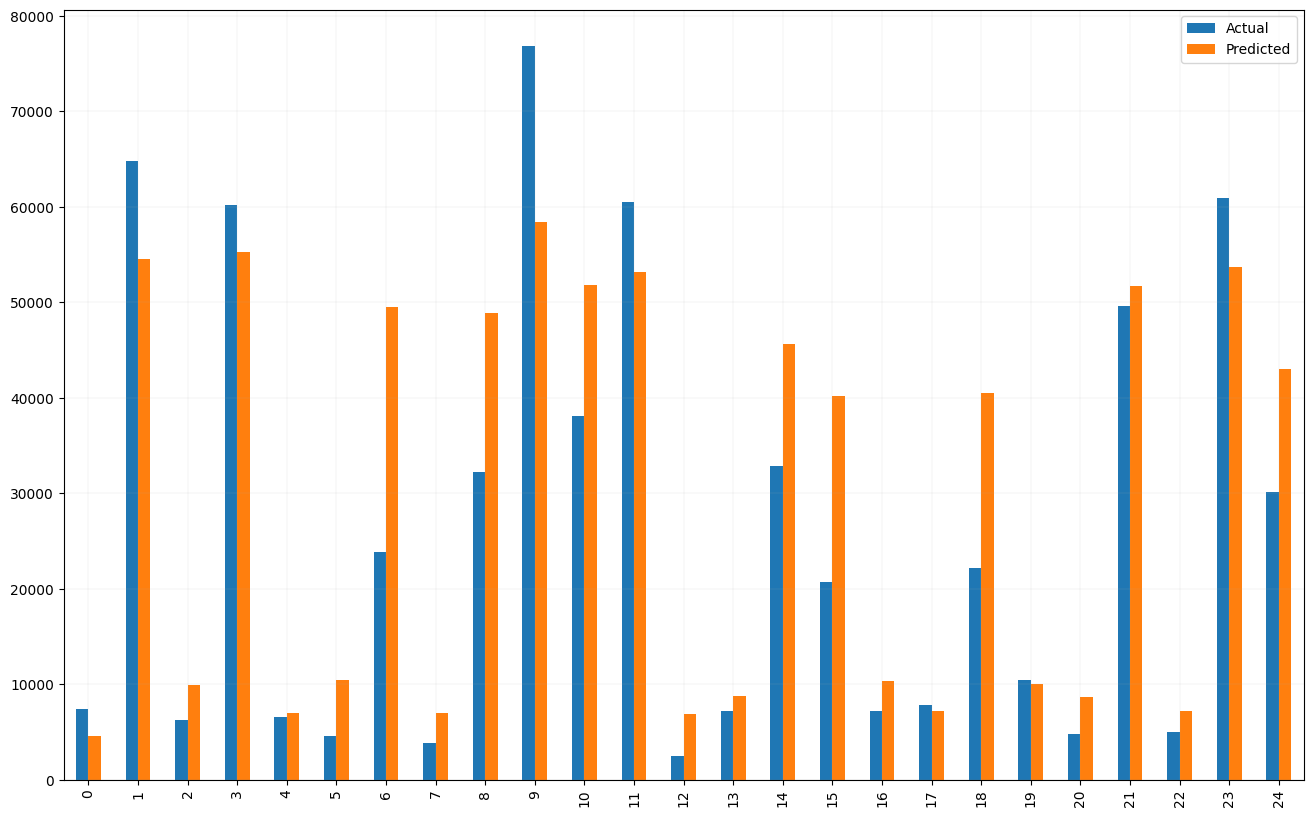

In [26]:
# Create a DataFrame (`df_lrm`) with 'Actual' and 'Predicted' columns for comparison
df_lrm = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': lr_y_predict.flatten()})

# Select the first 25 rows for visualization (you can adjust the number if needed)
df1 = df_lrm.head(25)

# Plot a bar chart comparing the 'Actual' and 'Predicted' values for the selected rows
df1.plot(kind='bar', figsize=(16, 10))

# Add grid lines for better readability
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')

# Show the plot
plt.show()


# Trainning an MPL Regressor Model

In [27]:
# Import MLPRegressor from scikit-learn
from sklearn.neural_network import MLPRegressor

# Create an instance of MLPRegressor with a specified maximum number of iterations
MLPR_model = MLPRegressor(max_iter=2000)

# Fit the MLPRegressor model to the training data (X_train, y_train)
MLPR_model.fit(X_train, y_train)


C:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=2000)

In [28]:
# Predict the target values using the trained MLP Regressor model (MLPR_model) on the test set (X_test)
MLPR_y_predict = MLPR_model.predict(X_test)

# Calculate the mean squared error (MSE) by comparing the true target values (y_test) with the predicted values (MLPR_y_predict)
MLPR_mse = mse(y_test, MLPR_y_predict)

# Print the calculated mean squared error
MLPR_mse


20309435.522530377

### Comparing Predicted and Actual Values for the MLP Regressor Model

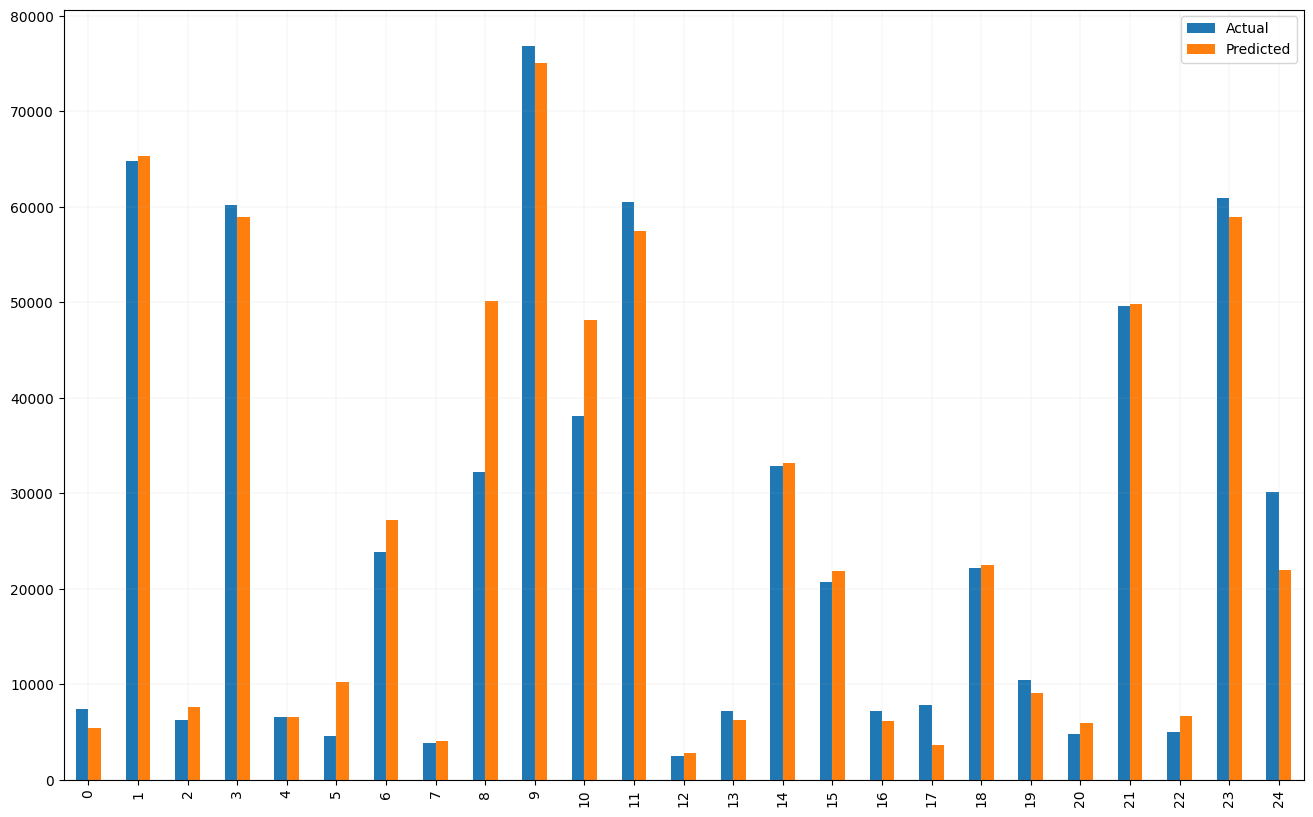

In [29]:
# Create a DataFrame (`df_lrm`) with 'Actual' and 'Predicted' columns for comparison
df_lrm = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': MLPR_y_predict.flatten()})

# Select the first 25 rows for visualization (you can adjust the number if needed)
df1 = df_lrm.head(25)

# Plot a bar chart comparing the 'Actual' and 'Predicted' values for the selected rows
df1.plot(kind='bar', figsize=(16, 10))

# Add grid lines for better readability
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')

# Show the plot
plt.show()


In [30]:
# Import RandomForestRegressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Create an instance of RandomForestRegressor with a specified number of estimators and random state
rf_model = RandomForestRegressor(n_estimators=20, random_state=9)

# Fit the RandomForestRegressor model to the training data (X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=9)

In [31]:
# Predict the target values using the trained model (rf_model) on the test set (X_test)
tb_y_predict = rf_model.predict(X_test)

# Calculate the mean squared error (MSE) by comparing the true target values (y_test) with the predicted values (tb_y_predict)
tb_mse = mse(y_test, tb_y_predict)

# Print the calculated mean squared error
tb_mse


11117493.52374872

### Comparing Predicted and Actual Values for the Random Forest Regressor Model

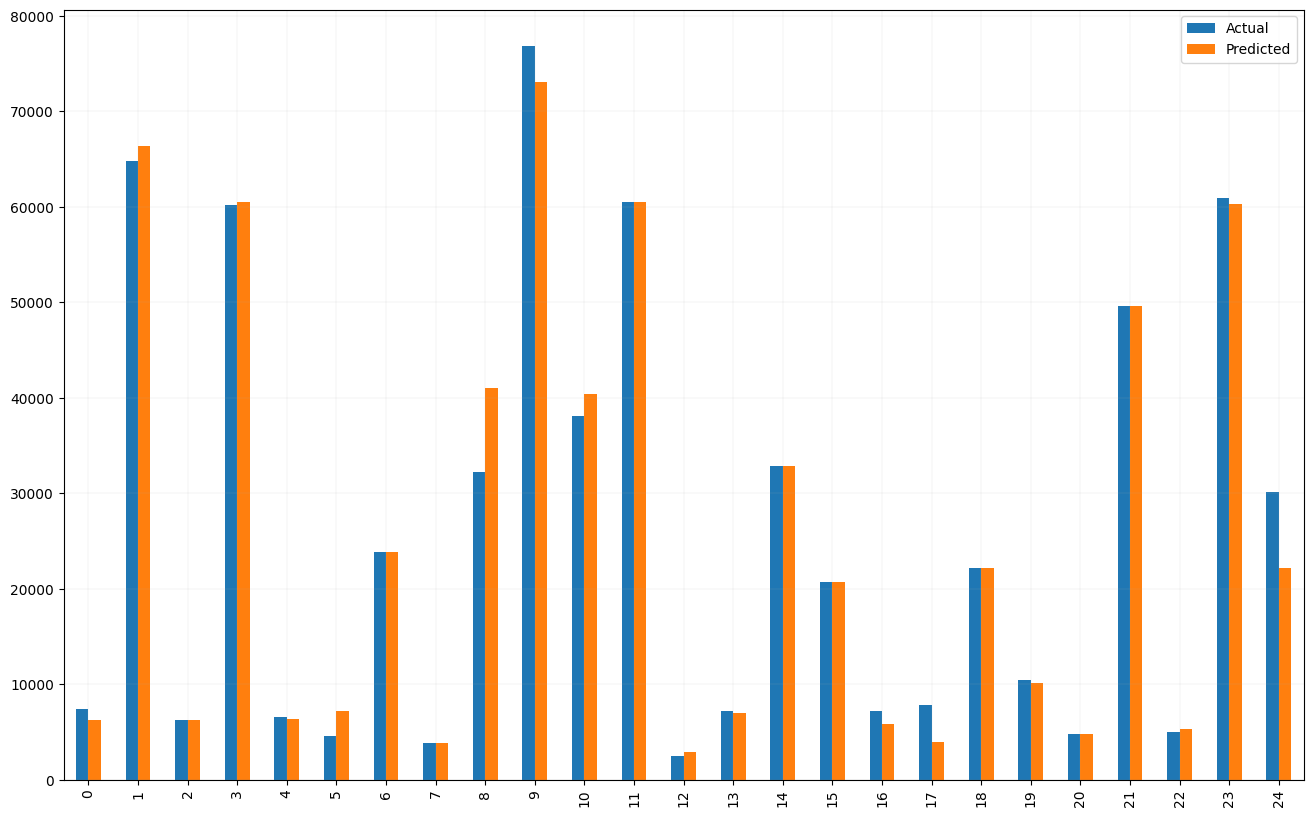

In [32]:
# Create a DataFrame (`df_lrm`) with 'Actual' and 'Predicted' columns for comparison
df_lrm = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': tb_y_predict.flatten()})

# Select the first 25 rows for visualization (you can adjust the number if needed)
df1 = df_lrm.head(25)

# Plot a bar chart comparing the 'Actual' and 'Predicted' values for the selected rows
df1.plot(kind='bar', figsize=(16, 10))

# Add grid lines for better readability
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')

# Show the plot
plt.show()


# Creating a Widget app for User test purposes

In [33]:
import ipywidgets as widgets
from IPython.display import display


# Define the feature selection widgets
airline_select = widgets.Dropdown(options=['GO_FIRST', 'Vistara', 'Air_India', 'Indigo', 'SpiceJet','AirAsia'],description = 'Airline: ', value = 'GO_FIRST')
source_city_select = widgets.Dropdown(options=['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai','Kolkata'],description = 'Source City: ', value = 'Mumbai')
stops_select = widgets.Dropdown(options=['zero', 'one', 'two_or_more'],description = '# of Stops: ', value = 'zero')
destination_city_select = widgets.Dropdown(options=['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai','Kolkata'],description = 'Destination: ', value = 'Delhi')
class_select = widgets.Dropdown(options=['Economy', 'Business'],description = 'Select Class: ', value = 'Economy')
duration_slider = widgets.FloatSlider(min=0.83, max=50.0, step=0.01, value=7.42, description='Duration')
days_left_slider = widgets.IntSlider(min=1, max=50, step=1, value=15, description='Days Left')



# Model selection
model_choice = widgets.RadioButtons(options=['Linear Regression', 'MLP Regressor', 'Random Forest'], value='Linear Regression', description='Choose Model:')
# User submission widget
predict_button = widgets.Button(description='Predict Price')

box = widgets.VBox([airline_select,source_city_select,stops_select,destination_city_select,class_select,duration_slider,days_left_slider,model_choice])

output = widgets.Output()

display(box, predict_button, output)


def predict_price(airline, source_city, stops, destination_city, class_, duration, days_left, model_choice):
    print(f'Input values: {airline}, {source_city}, {stops}, {destination_city}, {class_}, {duration}, {days_left}, {model_choice}')
    # Create a DataFrame with the selected features
    features_df = pd.DataFrame({
        'airline': [airline],
        'source_city': [source_city],
        'stops': [stops],
        'destination_city': [destination_city],
        'class': [class_],
        'duration': [duration],
        'days_left': [days_left],
        'price': [0]  # You can set the price to a placeholder value since it's not used during prediction
    })

    # Combine training and input data to ensure consistent encoding
    combined_data = pd.concat([flight_prices, features_df])

    # Apply the same preprocessing to the input data
    features_df_preprocessed = preprocessing.fit_transform(combined_data)

    
    # Ensure the feature names and order match the training data
    features_df_preprocessed = pd.DataFrame(data=features_df_preprocessed, columns=preprocessing.get_feature_names_out())

    # Keep only the relevant columns used during training
    features_df_preprocessed = features_df_preprocessed.drop('remainder__price', axis=1)

    # Select the last row for prediction
    features_df_user_input = features_df_preprocessed.iloc[-1:].copy()
    
    # Model selection
    if model_choice == 'Linear Regression':
        model = lr_model
    elif model_choice == 'MLP Regressor':
        model = MLPR_model
    else:
        model = rf_model

    # For test set prediction, use X_test
    prediction = model.predict(features_df_user_input)
    print(f'The predicted price is ₹{prediction[0]:.2f}')


predict_button.on_click(lambda _: predict_price(
    airline_select.value,
    source_city_select.value,
    stops_select.value,
    destination_city_select.value,
    class_select.value,
    duration_slider.value,
    days_left_slider.value,
    model_choice.value
))



Button(description='Predict Price', style=ButtonStyle())

Output()